## Task 1: Levensthein-Distance

**Hand-In**: Your implementation of the Levensthein-Algorithm.

The [Levensthein-Distance](https://en.wikipedia.org/wiki/Levenshtein_distance), or minimum edit distance, describes the minimum number of changes (deletions, insertions, substitutions) that are needed to convert one string to another.

Example: The Levensthein-Distance of `house` and `home` is 2.

1.   `hose` (delete 'u')
2.   `home` (substitute 's' with 'm')

You don't have to calculate the Levensthein-Distance by hand, however. It is described by a recursive algorithm. Below, you can see it displayed in 'mathematical' writing. We've also included a more detailed text description of how it works.

Your task will to be to tranform this algorithm into a recursive python function.

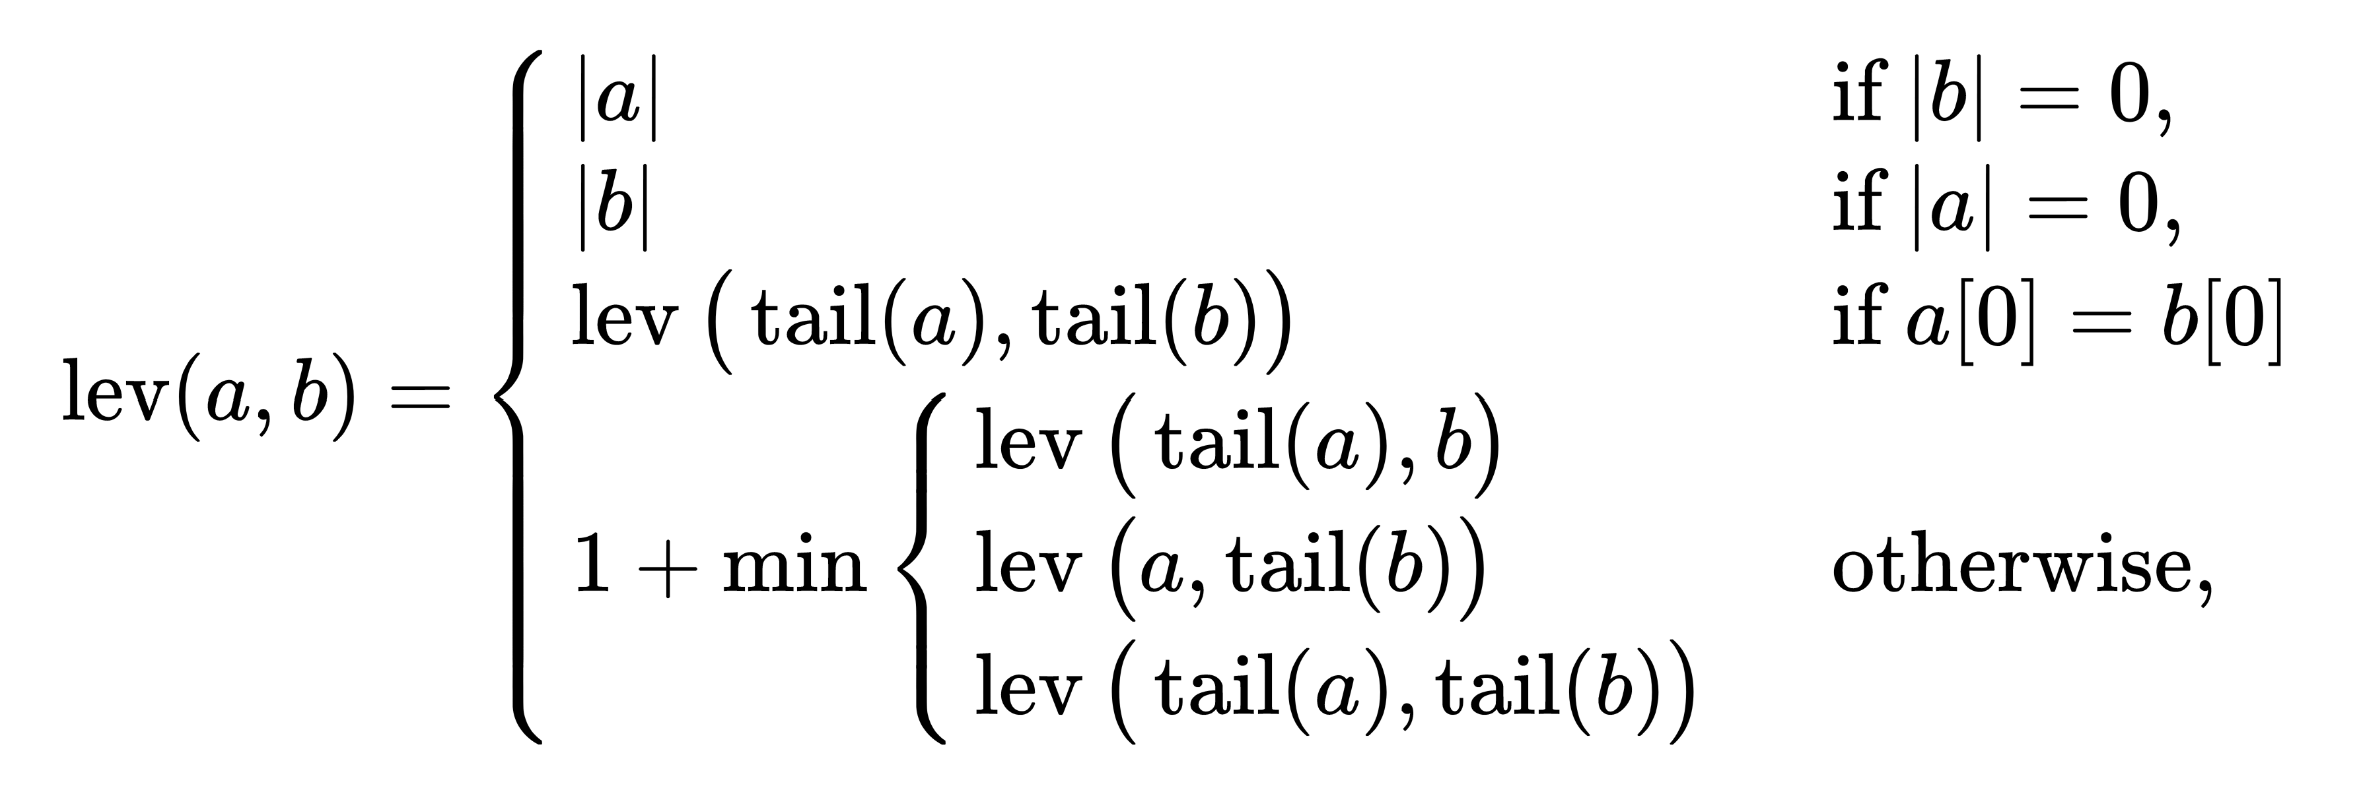

### Levensthein-Distance: How the algorithm works

The Levensthein-Algorithm is a **recursive** algorithm. That means it calls itself with 'easier' versions of the problem, until it is able to solve them using a base case. Here, the first two 'if's are the base cases, the other two call the `lev()` function again.

The function `lev(a,b)` returns an integer reflecting what the minimum-edit distance between the strings a and b is. We distinguish between four 'if' cases:

**if $|b|=0: |a|$**

String b has length 0, meaning it is empty. We just need to completely delete string a, so the minimum edit distance is the nr of characters that need to be deleted.

**if $|a|=0: |b|$**

Same as for case 1, but the other way around: Since string a is completely empty, we need to spell out string b from scratch. Therefore, the edit distance is the length of b.

**if $a[0] = b[0]: lev(tail(a), tail(b))$**

$tail()$ means everything but the first letter. If the first letter of a and b are identical, nothing needs to be changed. We move on to the rest of the string, calling the lev-function again. Using our example, we would move on to calculate the Levensthein-Distance of "ouse" and "ome".

**otherwise :**

This is the most complex case. We calculate three different options and then pick the one that results in the smallest number of edits.
Using our example again, these are the options:
*   the distance between 'ome' and 'house'
*   the distance between 'house' and 'ome'
*   the distance between 'ome' and 'ouse'

To the smallest edit distance out of these three we add one edit, since this is what we are doing by slicing the strings here. 




In [19]:
def lev(a, b):

  if len(b) == 0:
    return len(a)
  if len(a) == 0:
    return len(b)
  if a[0] == b[0]:
    return(lev(a[1:], b[1:]))
  else:
    return 1 + min(lev(a[1:], b), lev(a, b[1:]), lev(a[1:], b[1:]))
  

In [20]:
lev("house", "home") # should print 2
lev("cat", "chello") # should print 5

5

## Task 2: Fibonacci Numbers

**Hand-In:** A dynamic programming implementation of the Fibonacci-Algorithm.

Like the Levensthein-Distance, the [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) are also described by a recursive algorithm. The algorithm is defined as follows:


$F_n = F_{n-1} + F_{n-2}$

with n being the nth Fibonacci-number. The only exception are the starting values:

$F_0 = 0$

$F_1 = 1$

You can see the python implementation below:

In [21]:
def fibonacci(n):
  """
  returns: the nth Fibonacci-number
  """

  #print("Calculating n:", n)
  
  if n == 0:
    return 0

  elif n == 1:
    return 1

  else:
    return fibonacci(n-1) + fibonacci(n-2)

In [22]:
print("The 10th Fibonacci number:", fibonacci(10))

The 10th Fibonacci number: 55


### Dynamic Programming: Fibonacci Numbers

Recursive algorithms can be simple and powerful, but many of them have the same flaw: They can be **extremly inefficient**.

Since the function ends up calling itself several times in each run, the number of executions stack up fast. The main problem here is that since the function has no memory, it ends up calculating the same thing over and over again!

If you want to see this in action, simply remove the # in front of the print statement in the `fibonacci()` function above.

This is where **dynamic programming** comes in: Since the algorithm has no memory, it has to re-calculate the same steps again and again in every recursion. To solve this issue, we simply add a way to store values we have already calculated.

**Hints:**

*   Your 'memory storage' can just be a list.
*   You will need to remove the recursion from the algorithm, meaning it shouldn't call itself anymore. This is because otherwise it won't be able to 'remember' what it previously calculated.






In [23]:
def dynamic_fibonacci(n):
  """credits to stackoverflow"""

  mem = [0,1]

  for i in range(len(mem), n+1):
    mem.append(mem[i-1] + mem[i-2])

  return mem[n]

In [24]:
print("The 10th Fibonacci number:", dynamic_fibonacci(10))
print("The 50th Fibonacci number:", dynamic_fibonacci(50))

The 10th Fibonacci number: 55
The 50th Fibonacci number: 12586269025


## Task 3: Sorting and Asymptotic Complexity

### Part A:

**Hand-In:**

*   Part A: Your modified implementation of MergeSort.
*   Part B: Your answers to the questions.


For this task use reddit_dadjokes.csv as your data. For every joke create a tuple containing the joke's text as the first and its score as the second element, then store those tuples in a list. Sort the jokes according to their scores in descending order (i.e. starting at the largest score). To achieve this use the sorting algorithm already implemented below which is called **MergeSort** and works according to the following outline:

It is designed to recursively split an array of integers in half and then solve the problem by first sorting the two parts individually and then combining them again. This split happens until the newly generated split only consists of a single element, which has to be sorted by definition. The combination works by filling a new empty array with the - now sorted - content of both halfs of the original. This is acomplished by repeatedly choosing the smallest element from either the first half or the second half and then copying this one over to the new array. As both halfs are sorted, the smallest element of any given half has to be at the start.

To achieve the task specifications, a few modifications need to be made to the original MergeSort as implemented below:

- The implemented version of MergeSort expects a list of integers as its input, so this needs to be adapted to the new data type which is a list containing tuples of string and integers.

- You will need to change the ordering as this version of MergeSort will sort the jokes in ascending order (i.e. starting at the smallest element).

- Inside MergeSort check if the list to be sorted only has up to 6 elements. If so then use BubbleSort to sort this small part.

- Implement BubbleSort as described in the lecture and tutorial.


### Part B:

For this part list the **worst case Asymptotic Complexities** of both MergeSort and BubbleSort as well as an explanation of why you arrive at those. Why is the combination of MergeSort with BubbleSort as we did above still helpful?

### Your answer:

In [26]:
from typing import List, Tuple
import csv


In [27]:
def merge(array, left, right):
    i = j = k = 0
    while i < len(left) and j < len(right):
        if left[i][1] > right[j][1]:
            array[k] = left[i]
            i+=1
            k+=1
        else:
            array[k] = right[j]
            j+=1
            k+=1
    while i < len(left):
        array[k] = left[i]
        i+=1
        k+=1
    while j < len(right):
        array[k] = right[j]
        j+=1
        k+=1

def bubble_sort(array: List[tuple[str,int]]):
    for ahmasa in range(len(array)): # also how many are sorted already
        for index in range(len(array)-ahmasa-1):
            # descending: swaps the two numbers if the first is smaller --> transports the lowest one to the end
            if array[index][1] < array[index+1][1]:
                array[index], array[index+1]=array[index+1], array[index]

def merge_sort(array: List[tuple[str,int]]):
    if len(array) > 1:
        mid = len(array)//2
        left = array[:mid]
        right = array[mid:]
        if len(right) <= 6:
            bubble_sort(left)
            bubble_sort(right)
        else:
            merge_sort(left)
            merge_sort(right)
        merge(array, left, right)

In [31]:
# def merge_sort(array: List[(str,int)]):
#     if len(array) > 1:
#         mid = len(array)//2
#         left = array[:mid]
#         right = array[mid:]
#         merge_sort(left)
#         merge_sort(right)
#     merge(array, left, right)

with open('reddit_dadjokes.csv', 'r', encoding='utf-8') as foile:
    lines = csv.DictReader(foile, delimiter=',')
    list_to_sort = []
    for line in lines:
            list_to_sort.append((line['joke'],int(line['score'])))
merge_sort(list_to_sort)
# list_to_sort

[('Is this sub still active? There hasn’t been any posts all year.', 32507),
 ('My wife just gave birth today and after thanking the doctor, I pulled him aside and sheepishly asked, "How soon do you think we\'ll be able to have sex?" He winked at me and said, "I\'m off duty in ten minutes - meet me in the car park."',
  32348),
 ('As I handed my Dad his 50th birthday card, he looked at me with tears in his eyes and said, “You know, one would have been enough.”',
  31441),
 ("Is this sub still active? There hasn't been any posts all year.", 24549),
 ('My wife said that everything on this subreddit was stupid, unfunny puns... But I made [this](https://www.reddit.com/r/dadjokes/comments/98ei4l/otherwise) post yesterday that says otherwise.',
  24200),
 ('I took my 8-year old girl to the office with me on, "Take Your Kid to Work Day." As we were walking around the office, she starting crying and getting very cranky, so I asked what was wrong with her. As my coworkers gathered round, she so

B: 
The worst case for bubblesort is n^2, since we potentially have to iterate through the list for n times and swap each element n times. (well, in actuality it's n*(n+1))/2-n, in asymptote complexity this is equivalent to n^2.)
Meanwhile, Mergesort has a worst complexity of n*log(n). (A much better explanation than i could provide can be found here: https://www.khanacademy.org/computing/computer-science/algorithms/merge-sort/a/analysis-of-merge-sort)

So, since we include the more time-consuming bubblesort inside our mergesort algorithm, one might think that the former is now the bottleneck of the whole code.
However, since the bubblesort function is only executed when a list has reached 6 elements or less, the amount of time per execution of bubblesort is limited to the time it takes to bubblesort a list of length 6, and thus constant (c). For an array of length n, this is executed at most n/6+1 times. The bubblesort function thus takes a time of c/6 *n + 1 , which in Big-O notation is O(n). It therefore does not add to the time complexity of the overall sorting algorithm.